# Contexto do Desafio
A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

 Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#evitando que o pandas apresente valores em notação cientifica
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Importando e tratando os dados

In [2]:
df = pd.read_csv('C:/Users/55419/Desktop/Desafios extras/kc_house_data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# Vemos que o dataset não possui dados faltantes. Também nota-se algumas colunas que estão com seu dtype errado. iremos tratar 
#essas colunas.

df['date'] = pd.to_datetime(df['date'])
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors'] = df['floors'].astype('int64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int64         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int64         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [6]:
#Criando variaveis categoricas

df['waterfront']= df['waterfront'].astype('category')
df['view']= df['view'].astype('category')
df['condition']= df['condition'].astype('category')
df['zipcode']= df['zipcode'].astype('category')

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00000,3,1,1180,5650,1,0,0,...,7,1180.00000,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,2014-12-09,538000.00000,3,2,2570,7242,2,0,0,...,7,2170.00000,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,2015-02-25,180000.00000,2,1,770,10000,1,0,0,...,6,770.00000,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,2014-12-09,604000.00000,4,3,1960,5000,1,0,0,...,7,1050.00000,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,2015-02-18,510000.00000,3,2,1680,8080,1,0,0,...,8,1680.00000,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int64         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int64         
 8   waterfront     21613 non-null  category      
 9   view           21613 non-null  category      
 10  condition      21613 non-null  category      
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [9]:
#dropando casas duplicadas em nosso banco de dados, ficando apenas com a ultima observação
df = df.drop_duplicates(subset=['id'], keep='last')

In [10]:
#verificando se ficamos com dados duplicados
df.loc[df['id'].duplicated(keep=False)].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21436.00000,21436.00000,21436.00000,21436.00000,21436.00000,21436.00000,21436.00000,21436.00000,21434.00000,21436.00000,21436.00000,21436.00000,21436.00000,21436.00000,21436.00000,21436.00000
mean,4580765328.17788,541649.96273,3.37157,1.75168,2082.70494,15135.63785,1.44822,7.66174,1790.96613,291.74450,1971.09843,84.72980,47.56016,-122.21370,1988.31438,12785.96128
std,2876589633.67309,367314.92939,0.92920,0.73486,919.14647,41538.62061,0.55235,1.17426,829.06401,442.78198,29.38528,402.43101,0.13860,0.14090,685.69909,27375.46747
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123700078.75000,324866.00000,3.00000,1.00000,1430.00000,5040.00000,1.00000,7.00000,1200.00000,0.00000,1952.00000,0.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3904921185.00000,450000.00000,3.00000,2.00000,1920.00000,7614.00000,1.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,47.57200,-122.23000,1840.00000,7620.00000
75%,7308675062.50000,645000.00000,4.00000,2.00000,2550.00000,10696.25000,2.00000,8.00000,2220.00000,560.00000,1997.00000,0.00000,47.67800,-122.12400,2370.00000,10087.25000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,47.77760,-121.31500,6210.00000,871200.00000


In [12]:
df['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
#vemos que existe um valor para "bedrooms" que foi marcado errado, 33, altera-lo
df['bedrooms'] = np.where(df['bedrooms'] == 33, 3, df['bedrooms'])
df['bedrooms'].value_counts()

3     9732
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

# Feature engineering

Como o intuito não é criar um modelo, não irei realizar tratamento nas variaveis num., irei apenas criar novas variaveis conforme julguei necessário.

In [14]:
# Criando uma feature de preço por living_ft²

df['price_living_sqft'] = df['price']/df['sqft_living']

# Criando uma feature de preço por lot_ft²

df['price_l_sqft'] = df['price']/df['sqft_lot']

# Como é pedido que diga qual a melhor época para se comprar e qual o melhor periodo para vender, irei criar a variavel mes / ano / estação do ano

df['month'] = df['date'].dt.month

df['year'] = df['date'].dt.year

df['estacao_ano'] = df['month'].apply(lambda x: 'primavera' if 3 <= x <= 5 else
                                                   'verão' if 6 <= x <= 8 else
                                                   'outono' if 9 <= x <= 11 else
                                                   'inverno')

# Transformando algumas variaveis

Como todas as variaveis são int ou float, acho válido que variaveis que são categoricas sejam tratadas como tal, sendo assim, irei transformar variaveis num. em categoricas agrupando e categorizando estas variaveis.

In [15]:
#Categorizando as casas com base na quantidade de quartos (divisão será feita para casas com até 3 quartos ou mais que 3 quartos)
#decisão tomada com base na mediana.
df['num_quartos'] = df['bedrooms'].apply(lambda x: 'até 3 quartos' if x <= 3
                                            else 'mais que 3 quartos')

#Categorizando as casas com base na quantidade de banheiros (divisão será feita para casas com até 2 banheiros ou mais que 2 banheiros)
#decisão tomada com base na mediana.

df['num_banheiros'] = df['bathrooms'].apply(lambda x: 'até 2 banheiros' if x <= 2
                                            else 'mais que 2 banheiros')

#Categorizando as casas com base na quantidade de andares (divisão será feita para casas de 1 andar ou casa com mais de 1 andar)
#decisão tomada com base na mediana.

df['num_andares'] = df['floors'].apply(lambda x: 'casa térrea' if x <= 1
                                            else 'com mais de 1 andar')

#Categorizando as casas com base na nota (divisão será feita com base em informações fornecidas pelo responssável do dataset
# 1 até 3 recebe ruim, 4 até 7 recebe médio de 8 até 10 recebe bom e de 11 até 13 muito bom).

df['nota'] = df['grade'].apply(lambda x: 'ruim' if x <= 3 else
                                   'média' if 4 <= x <= 7 else
                                   'bom' if 8 <= x <= 10 else
                                   'muito bom')

#Categorizando as casas com porão e sem porão.

df['porão'] = df['sqft_basement'].apply(lambda x: 'sem porão' if x <= 0
                                            else 'com porão')

#Categorizando as casas com reforma e sem reforma.

df['reforma'] = df['yr_renovated'].apply(lambda x: 'sem reforma' if x <= 0
                                            else 'com reforma')

#Categorizando as casas com base no preço decisão tomada com base na mediana.

df['padrao_imovel'] = df['price'].apply(lambda x: 'baixo' if x < 400000 
                                    else      'medio' if 40000 <= x <= 650000 
                                    else      'alto')
df['tam_imov'] = df['sqft_living'].apply(lambda x: 'menor_100m2' if x <= 1076.39
                                            else 'maior_100m2')


In [16]:
df.nota.value_counts()

média        11154
bom           9780
muito bom      498
ruim             4
Name: nota, dtype: int64

# Analisando a distribuição de algumas variaveis

<AxesSubplot:xlabel='price', ylabel='Count'>

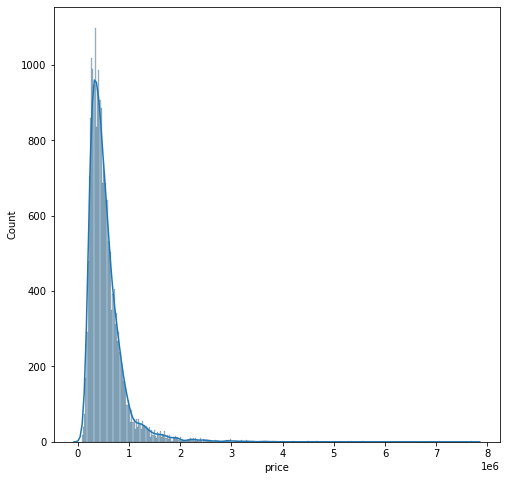

In [17]:
plt.figure(figsize=(8,8))
sns.histplot(df.price, alpha=0.4, kde=True, kde_kws={"cut": 3}) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='yr_built', ylabel='Count'>

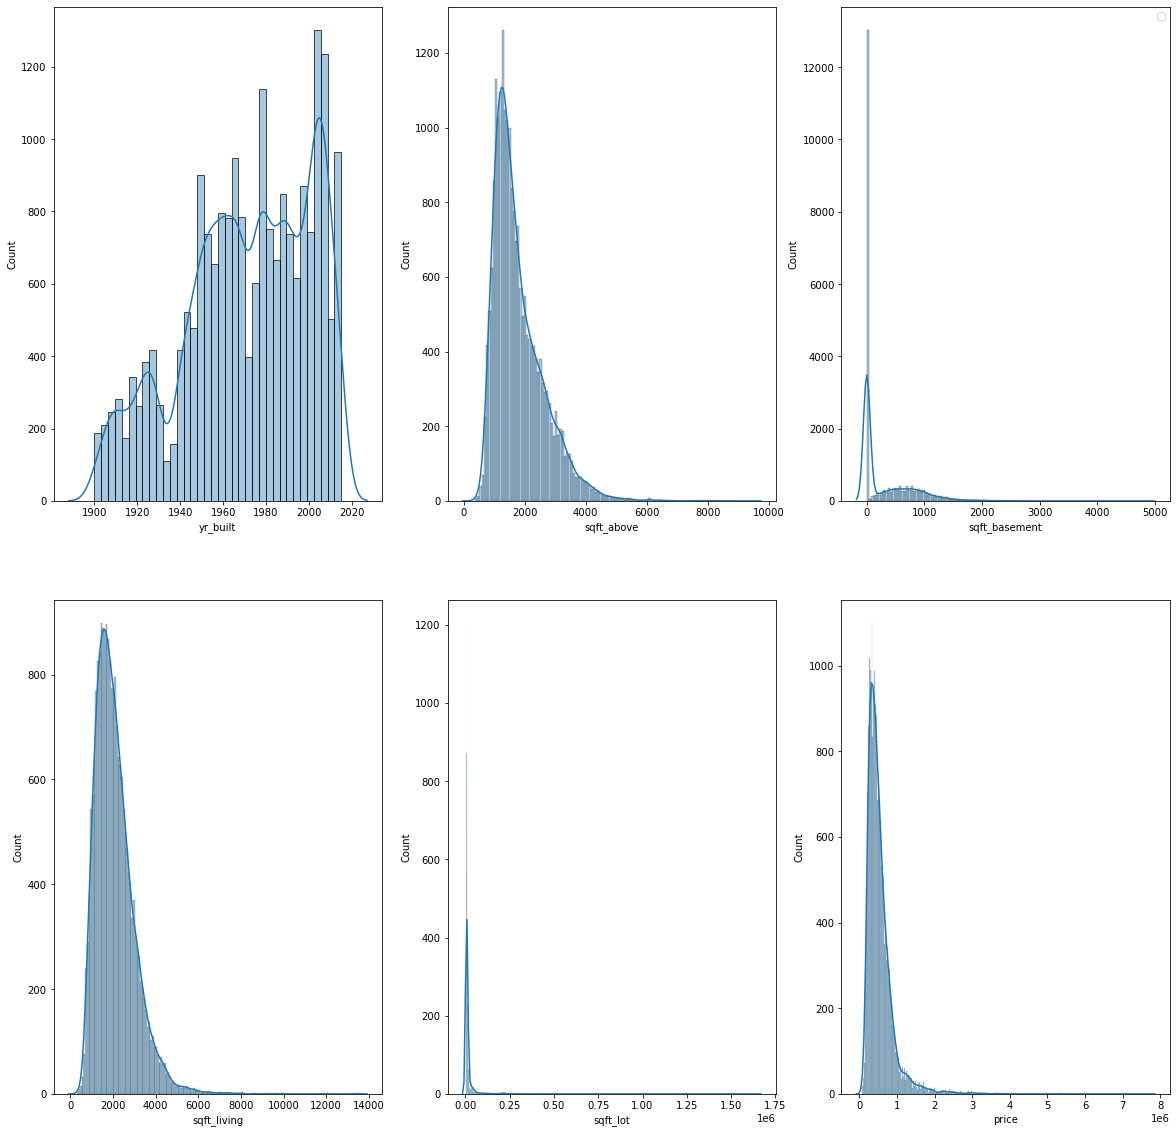

In [18]:
plt.figure(figsize=(20,20))
plt.figure(1)
plt.subplot(2,3,6)
sns.histplot(df.price, alpha=0.4, kde=True, kde_kws={"cut": 3})
plt.subplot(2,3,2)
sns.histplot(df.sqft_above, alpha=0.4, kde=True, kde_kws={"cut": 3})
plt.subplot(2,3,3)
sns.histplot(df.sqft_basement, alpha=0.4, kde=True, kde_kws={"cut": 3})
plt.legend(loc = 1)
plt.subplot(2,3,4)
sns.histplot(df.sqft_living, alpha=0.4, kde=True, kde_kws={"cut": 3})
plt.subplot(2,3,5)
sns.histplot(df.sqft_lot, alpha=0.4, kde=True, kde_kws={"cut": 3})
plt.subplot(2,3,1)
sns.histplot(df.yr_built, alpha=0.4, kde=True, kde_kws={"cut": 3})

# Testando hipóteses para verificar alguns insights

# Hipótese 1 - Verificando se existe diferença entre padrão de imóveis com até 3 quartos com relação à imóveis com mais de 3 quartos

In [19]:
#h0 = não há diferença 
#h1 = há diferença

df1 = df.copy()

from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df1['num_quartos'],
                      df1['padrao_imovel'])

stat, p,df1, expected = chi2_contingency(crosstab)
print('stat = %.3f, p = %.3f' % (stat,p))

stat = 2009.327, p = 0.000


In [20]:
# Como o p-valor é menor que 0.05, pode-se dizer que há diferença estatística entre o padrão de imóveis com até 3 quartos para
# imóveis com mais que 3 quartos.

h1 = df[['price', 'num_quartos']].groupby('num_quartos').mean().reset_index()
h1_preco = (h1.loc[1,'price'] / h1.loc[0,'price'])
print(f'Imóveis com mais de 3 quartos são em média, {h1_preco:.2f} vezes mais caros que imóveis com até 3 quartos.')
h1

Imóveis com mais de 3 quartos são em média, 1.49 vezes mais caros que imóveis com até 3 quartos.


,num_quartos,price
0,até 3 quartos,451318.19424
1,mais que 3 quartos,672337.68851


# Hipótese 2 -  Verificando se existe diferença entre padrão de imóveis com até 2 banheiros para imóveis com mais de 2 banheiros

In [21]:
#h0 = não há diferença 
#h1 = há diferença

df2 = df.copy()

from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df2['num_banheiros'],
                      df2['padrao_imovel'])

stat, p,df1, expected = chi2_contingency(crosstab)
print('stat = %.3f, p = %.3f' % (stat,p))

stat = 2900.307, p = 0.000


In [22]:
# Como o p-valor é menor que 0.05, pode-se dizer que há diferença estatística entre o padrão de imóveis com mais de 2 banheiros
# para imóveis com até 2 banheiros.

h2 = df[['price', 'num_banheiros']].groupby('num_banheiros').mean().reset_index()
h2_preco = (h2.loc[1,'price'] / h2.loc[0,'price'])
print(f'Imóveis com mais de 2 banheiros são em média, {h2_preco:.2f} vezes mais caros que imóveis com até 2 banheiros.')
h2

Imóveis com mais de 2 banheiros são em média, 2.05 vezes mais caros que imóveis com até 2 banheiros.


,num_banheiros,price
0,até 2 banheiros,480015.47497
1,mais que 2 banheiros,985060.15367


# Hipótese 3 -  Verificando se existe diferença entre padrão de imóveis beira mar e padrão de imóveis que não são beira mar

In [23]:
#h0 = não há diferença 
#h1 = há diferença

df3 = df.copy()

from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df3['waterfront'],
                      df3['padrao_imovel'])

stat, p,df1, expected = chi2_contingency(crosstab)
print('stat = %.3f, p = %.3f' % (stat,p))

stat = 296.746, p = 0.000


In [24]:
# Como o p-valor é menor que 0.05, pode-se dizer que há diferença estatística entre o padrão de imóveis a beira mar e imóveis
# que não são beira mar.

h3 = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
h3_preco = (h3.loc[1,'price'] / h3.loc[0,'price'])
print(f'Imóveis beira mar são em média, {h3_preco:.2f} vezes mais caros que imóveis que não são beira mar.')
h3

Imóveis beira mar são em média, 3.12 vezes mais caros que imóveis que não são beira mar.


,waterfront,price
0,0,533066.46025
1,1,1661876.02454


#  Hipótese 4 -  Verificando se existe diferença entre padrão de imóveis reformados para imóveis sem reformas

In [25]:
#h0 = não há diferença 
#h1 = há diferença

df4 = df.copy()

from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df4['reforma'],
                      df4['padrao_imovel'])

stat, p,df1, expected = chi2_contingency(crosstab)
print('stat = %.3f, p = %.3f' % (stat,p))

stat = 262.973, p = 0.000


In [26]:
# Como o p-valor é menor que 0.05, pode-se dizer que há diferença estatística entre o padrão de imóveis reformados e imóveis
# que não foram reformados.

h4 = df[['price', 'reforma']].groupby('reforma').mean().reset_index()
h4_preco = (h4.loc[0,'price'] / h4.loc[1,'price'])
print(f'Imóveis reformados são em média, {h4_preco:.2f} vezes mais caros que imóveis que não são reformados.')
h4

Imóveis reformados são em média, 1.43 vezes mais caros que imóveis que não são reformados.


,reforma,price
0,com reforma,762118.05824
1,sem reforma,531875.72679


# Para resolver uma das questões levantadas pelo CEO, vamos analisar o valor dos imóveis por região
Nesta análise iremos pegar a mediana do preço por região (com base no zipcode). Sendo assim imóveis que estejam com valor abaixo da mediana do preço da região seriam possiveis imóveis a serem adquiridos, porpem é válido lembrar que os imóveis estão classificados com uma condição, que se refere ao estado do imóvel, caberia ao CEO com base nas informações levantadas anteriormente (imóveis reformados são em média 1.43 vezes mais caros que imóveis sem reformas) decidir se ele pretende reformar os imóveis antes da venda ou não. Sabemos que imóveis com mais de 2 banheiros são em média 2.05 vezes mais caros que imóveis com até 2 banheiros. Para direcionar meu estudo irei sugerir a compra de imóveis com até 2 banheiros, com mais de 1076,39 sqt_living (100m²) e que custem 0.7 vezes o valor da mediana do preço da região, pois assim é possível manter uma margem para venda sem reforma e caso decida reformar conseguir uma valorização com a reforma e a construção de um banheiro adicional.

In [27]:
#Analisando o valor dos imóveis por região

zipcode = df[['zipcode', 'price']].groupby('zipcode').median().reset_index()

df_zip = pd.merge(zipcode, df, on='zipcode', how='inner')
df_zip = df_zip.rename(columns = {'price_y' : 'price', 'price_x' : 'mediana_preco_bairro'})

for i in range(len(df_zip)):
    if (df_zip.loc[i, 'price']< 0.7 * df_zip.loc[i,'mediana_preco_bairro']) & (df_zip.loc[i, 'num_banheiros'] == 'até 2 banheiros') & (df_zip.loc[i, 'tam_imov'] == 'maior_100m2') & (df_zip.loc[i, 'reforma'] == 'sem reforma') :
        df_zip.loc[i, 'status'] = 'Comprar'
    else:
        df_zip.loc[i, 'status'] = 'Não comprar'
        
compra = df_zip[df_zip['status'] == 'Comprar']


sug_compra = compra[['id', 'zipcode', 'price', 'mediana_preco_bairro', 'estacao_ano', 'nota']]

sug_compra

,id,zipcode,price,mediana_preco_bairro,estacao_ano,nota
41,303000445,98001,175000.00000,260000.00000,primavera,média
43,7696600240,98001,165000.00000,260000.00000,outono,média
57,3356407665,98001,180000.00000,260000.00000,outono,média
106,4012800050,98001,175000.00000,260000.00000,primavera,média
121,1311400120,98001,160000.00000,260000.00000,verão,média
...,...,...,...,...,...,...
21421,2770601696,98199,439990.00000,689900.00000,verão,bom
21425,2770601775,98199,399950.00000,689900.00000,outono,bom
21428,2770601769,98199,435000.00000,689900.00000,verão,bom
21429,2771604196,98199,465000.00000,689900.00000,verão,bom


In [28]:
sug_compra.nota.value_counts()

média    1152
bom       309
Name: nota, dtype: int64

# Após a casa comprada com base na análise feita previamente, iremos avaliar qual o melhor momento de venda e por quanto vender

#  Hipótese 5 -  Verificando se existe diferença entre o preço de imóveis vendidos nas diferentes estações do ano 

In [29]:
df5 = df.copy()

from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df5['estacao_ano'],
                      df5['price'])

stat, p,df1, expected = chi2_contingency(crosstab)
print('stat = %.3f, p = %.3f' % (stat,p))

stat = 11883.677, p = 0.749


In [30]:
# Como o p-valor é maior que 0.05, pode-se dizer que não há diferença estatística entre o preço de imóveis vendidos nas diferentes
# estações do ano

h5 = df[['price', 'estacao_ano']].groupby('estacao_ano').mean().reset_index()
h5

,estacao_ano,price
0,inverno,520295.46752
1,outono,533583.45344
2,primavera,552934.18511
3,verão,548939.99137


In [31]:
# Como podemos observar na tabela h5, a média do preço de venda é maior na primavera, seguida pelo verão depois outono e ai sim
# inverno

In [32]:
df.estacao_ano.value_counts()

primavera    6499
verão        6254
outono       5004
inverno      3679
Name: estacao_ano, dtype: int64

In [33]:
# Vemos que imóveis são mais vendidos na primavera e no verão, com uma diferença pequena na quantidade de vendas, em seguida
# vem imóveis vendidos no outono e por fim a época em que se vende menos imóveis é no inverno. Combinando a análise de preço
# médio de venda por estação do ano com a análise de venda de imóveis por estação, pode-se concluir que o melhor momento para
# compra de imóveis é no inverno, pois é quando a média de preços está em baixa e o melhor momento para vender um imóvel
# comprado no inverno seria na primavera / verão que é quando a média dos preços começam a subir. O melhor lucro será vendendo,
# na primavera.

In [34]:
h5_preco = (h5.loc[2,'price'] / h5.loc[0,'price'])
print(f'Imóveis vendidos na primavera são em média, {h5_preco:.2f} vezes mais caros que imóveis vendidos no inverno.')


Imóveis vendidos na primavera são em média, 1.06 vezes mais caros que imóveis vendidos no inverno.


# Definindo o valor de uma casa comprada no inverno e vendida no verão
Irei considerar as casas da tabela sug_venda, porém irei selecionar apenas casas vendidas no inverno para vende-las na primavera. Como minha tabela sug_compra possui casas que já custam 0.7 vezes o valor da mediana do bairro, e sugiro que seja feita reforma na casa e nesta reforma seja construido banheiro para que a casa passe a ter 3 ou mais banheiros, considerando que casas com 3 ou mais banheiros custam em média 2.05x mais que casa com até 2 banheiros e casas reformadas custam em média 1.43x mais que casas sem reforma, o preço para venda pode ser 2.5x o valor de compra, lembrando que o CEO irá comprar casas na baixa e vender quando o mercado está mais aquecido, na primavera onde o volume de vendas é quase 2x maior que no inverno.

In [35]:
lucro = sug_compra[sug_compra['estacao_ano'] == 'inverno']
lucro.nota.value_counts()

média    232
bom       42
Name: nota, dtype: int64

In [36]:
# Como só temos casas com notas médias e boas, o valor gasto com a reforma pode não ser tão alto,além de que será possível realizar
# reformas com uma janela de duração relativamente pequena, dando margem para adquirir casas ao longo do inverno todo e conseguindo
# vender na primavera.

# Irei sugerir 2 preços de venda, sendo uma opção sem nenhuma reforma, e outra opção com reforma e construção de banheiro.

lucro['preço_sem_reforma'] = lucro['price'] * 1.6

lucro['preço_com_reforma'] = lucro['price'] * 2.5

lucro['lucro_obtido_sem_reforma'] = lucro['preço_sem_reforma'] - lucro['price']

lucro['lucro_obtido_com_reforma'] = lucro['preço_com_reforma'] - lucro['price']

lucro_sem_reforma = lucro['lucro_obtido_sem_reforma'].sum()
lucro_com_reforma = lucro['lucro_obtido_com_reforma'].sum()

print(f'O lucro obtido com a venda de imóveis sem reforma é de ${lucro_sem_reforma:.2f}')
print(f'O lucro obtido com a venda de imóveis com reforma é de ${lucro_com_reforma:.2f}')

O lucro obtido com a venda de imóveis sem reforma é de $53130453.00
O lucro obtido com a venda de imóveis com reforma é de $132826132.50


In [ ]:
# Regressão linear,para verificar EXTRA

In [56]:
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as smf
import statsmodels.api as smf
import statsmodels.formula.api as smf
import os

modelo1 = smf.ols(formula = 'price ~ zipcode + floors + nota + num_banheiros + num_quartos + reforma + padrao_imovel + tam_imov + waterfront', data = df)
modelo1_fit = modelo1.fit()
modelo1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     863.1
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:27:43   Log-Likelihood:            -2.8963e+05
No. Observations:               21436   AIC:                         5.794e+05
Df Residuals:                   21355   BIC:                         5.801e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              7.124e+05   1.29e+04     55.344      0.000    6.87e+05    7.38e+05
zipcode[T.98002]                       -1.38e+04   1.59e+04     -0.869      0.385   -4.49e+04    1.73e+04
zipcode[T.98003]                        455.2405   1.43e+04      0.032      0.975   -2.76e+04    2.86e+04
zipcode[T.98004]                       5.762e+05   1.44e+04     39.902      0.000    5.48e+05    6.04e+05
zipcode[T.98005]                       1.331e+05   1.71e+04      7.762      0.000    9.95e+04    1.67e+05
zipcode[T.98006]                       1.618e+05   1.29e+04     12.538      0.000    1.36e+05    1.87e+05
zipcode[T.98007]                       1.177e+05   1.81e+04      6.495      0.000    8.22e+04    1.53e+05
zipcode[T.98008]                       1.468e+05   1.45e+04     10.099      0.000    1.18e+05    1.75e+05
zipcode[T.98010]                       4.653e+04   2.04e+04      2.286      0.022    6629.230    8.64e+04
zipcode[T.98011]                       8.158e+04   1.61e+04      5.058      0.000       5e+04    1.13e+05
zipcode[T.98014]                       5.816e+04   1.88e+04      3.096      0.002    2.13e+04     9.5e+04
zipcode[T.98019]                        6.99e+04   1.61e+04      4.334      0.000    3.83e+04    1.02e+05
zipcode[T.98022]                       2.319e+04   1.51e+04      1.539      0.124   -6342.505    5.27e+04
zipcode[T.98023]                      -2.057e+04   1.24e+04     -1.653      0.098    -4.5e+04    3814.876
zipcode[T.98024]                        1.12e+05   2.23e+04      5.033      0.000    6.84e+04    1.56e+05
zipcode[T.98027]                       7.738e+04   1.32e+04      5.868      0.000    5.15e+04    1.03e+05
zipcode[T.98028]                       8.494e+04   1.44e+04      5.913      0.000    5.68e+04    1.13e+05
zipcode[T.98029]                       8.388e+04   1.41e+04      5.949      0.000    5.62e+04    1.12e+05
zipcode[T.98030]                       1.312e+04   1.47e+04      0.893      0.372   -1.57e+04    4.19e+04
zipcode[T.98031]                       2.021e+04   1.44e+04      1.405      0.160   -7976.711    4.84e+04
zipcode[T.98032]                      -7196.9583   1.87e+04     -0.385      0.700   -4.39e+04    2.95e+04
zipcode[T.98033]                       2.122e+05   1.32e+04     16.066      0.000    1.86e+05    2.38e+05
zipcode[T.98034]                       1.115e+05   1.24e+04      9.003      0.000    8.72e+04    1.36e+05
zipcode[T.98038]                        3.95e+04    1.2e+04      3.287      0.001    1.59e+04    6.31e+04
zipcode[T.98039]                       1.184e+06   2.77e+04     42.800      0.000    1.13e+06    1.24e+06
zipcode[T.98040]                       3.615e+05   1.48e+04     24.399      0.000    3.33e+05    3.91e+05
zipcode[T

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21436 entries, 0 to 21612
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21436 non-null  int64         
 1   date               21436 non-null  datetime64[ns]
 2   price              21436 non-null  float64       
 3   bedrooms           21436 non-null  int64         
 4   bathrooms          21436 non-null  int64         
 5   sqft_living        21436 non-null  int64         
 6   sqft_lot           21436 non-null  int64         
 7   floors             21436 non-null  int64         
 8   waterfront         21436 non-null  category      
 9   view               21436 non-null  category      
 10  condition          21436 non-null  category      
 11  grade              21436 non-null  int64         
 12  sqft_above         21434 non-null  float64       
 13  sqft_basement      21436 non-null  int64         
 14  yr_bui